$$\Huge \textbf{Background}$$

There are algorithms for calculation multipication of matrices $A$  and $B$ with order $n \times n$:
$$
\begin{array}{ll}
\textbf{Proposed by} & \textbf{Complexity}\\
Standart\, algorithm & O(n^3)\\
Strassen\, (1969) & O(n^{2.81})\\
Pan \,(1978) & O(n^{2.79})\\
Bini\, et al. \,(1979) & O(n^{2.78})\\
Schönhage\,(1981) & O(n^{2.55})\\
Pan; \,Romani;\, Coppersmith;\,Winograd\, (1981-1982) & O(n^{2.50})\\
Strassen \,(1987) & O(n^{2.48})\\
Coppersmith;\,Winograd\, (1987) & O(n^{2.375})\\
Stothers\, (2010) & O(n^{2.3737})\\
Williams\, (2011) & O(n^{2.3729})\\
Le\,Gall\, (2014) & O(n^{2.37286})\\
\end{array}
$$

The first Strassen's algorithm, which proposed in 1969, is useful in practice, but the others require deep mathematical structure and impractical.

So, below we'll see Strassen's algorithm.

$$\Huge \textbf{Steps of Strassen's algorithm}$$

Let the matrices $A$, $B$ and the result matrix $C$ are $(n \times n)$ matrices, where $n=2^k$.

$\textbf{Step 1}$

Partition $A$, $B$ and $C$ matrices into four $(\frac{n}{2}\times\frac{n}{2}$) submatrices, so that

$$\left( 
\begin{array}{ll} 
C_{11}& C_{12} \\
C_{21}& C_{22}
\end{array} 
\right) = \left( 
\begin{array}{ll} 
A_{11}& A_{12} \\
A_{21}& A_{22}
\end{array} 
\right) \cdot \left( 
\begin{array}{ll} 
B_{11}& B_{12} \\
B_{21}& B_{22}
\end{array} 
\right).$$

It is easy to see that $$C_{11}=A_{11}\cdot B_{11}+A_{12}\cdot B_{21},\,C_{12}=A_{11}\cdot B_{12}+A_{12}\cdot B_{22},\,
C_{21}=A_{21}\cdot B_{11}+A_{22}\cdot B_{21},\, C_{22}=A_{21}\cdot B_{12}+A_{22}\cdot B_{22} \qquad\qquad\qquad (*)$$.

$\textbf{Step 2}$

Calculate recursively 7 calculated matrix multiplications:

$$
\begin{array}{l}
P_1=(A_{11}+A_{22})(B_{21}+B_{12})\\
P_2=(A_{21}+A_{22})B_{11}\\
P_3=A_{11}(B_{12}+B_{22})\\
P_4=A_{22}(B_{21}+B_{1})\qquad\qquad\qquad\qquad\qquad\qquad\qquad (**)\\
P_5=(A_{11}-A_{12})B_{22}\\
P_6=(A_{21}-A_{22})(B_{11}+B_{12})\\
P_7=(A_{12}-A_{22})(B_{21}+B_{22}) 
\end{array}$$

$\textbf{Step 3}$

Form matrix $C$ using operations $+, \, -$ and 7 matrices $P_1, P_2,\ldots,P_7$. Namely,
$$
\begin{array}{l}
C_{11}=P_1+P_4-P_5+P_7\\
C_{12}=P_3+P_5\\
C_{21}=P_2+P_5\\
C_{22}=P_1-P_2+P_3+P_6
\end{array}$$

So, Strassen reduced 8 matrix multiplications in $(*)$ to 7 matrix multiplications in $(**)$.

# Standart algorithm: Matrices multiplication

In [2]:
def Initialize(n):
    M =[[0 for j in range(0, n)] for i in range(0, n)]
    return M

def StandartMult(A, B):
    n = len(A)
    C = Initialize(n)
    for i in range(n):
            for j in range(n):
                for k in range(n):
                    C[i][j] += A[i][k] * B[k][j]
    return C

# Matrices Adding Function 

In [3]:
def addMatrices(A, B):
    n = len(A)
    C = Initialize(n)
    for i in range(0, n):
        for j in range(0, n):
            C[i][j] = A[i][j] + B[i][j]
    return C

# Matrices Subtracting Function

In [4]:
def subtractMatrices(A, B):
    n = len(A)
    C = Initialize(n)
    for i in range(0, n):
        for j in range(0, n):
            C[i][j] = A[i][j] - B[i][j]
    return C

# Strassen's Recursive Function

In [5]:
def StrassenR(A, B):
 
    n = len(A)

    if n <= 2**6:# lower bound of n that Strassen' algorithm run time doesn't differ from Standart algorithm run time
        return StandartMult(A, B)
    else:
        # initializing the new sub-matrices
        half_n = n//2
        a11 = Initialize(half_n)
        a12 = Initialize(half_n)
        a21 = Initialize(half_n)
        a22 = Initialize(half_n)

        b11 = Initialize(half_n)
        b12 = Initialize(half_n)
        b21 = Initialize(half_n)
        b22 = Initialize(half_n)

        aResult = Initialize(half_n)
        bResult = Initialize(half_n)

        # dividing the matrices in 4 sub-matrices:
        for i in range(0, half_n):
            for j in range(0, half_n):
                a11[i][j] = A[i][j]                    # top left
                a12[i][j] = A[i][j + half_n]           # top right
                a21[i][j] = A[i + half_n][j]           # bottom left
                a22[i][j] = A[i + half_n][j + half_n]  # bottom right

                b11[i][j] = B[i][j]                    # top left
                b12[i][j] = B[i][j + half_n]           # top right
                b21[i][j] = B[i + half_n][j]           # bottom left
                b22[i][j] = B[i + half_n][j + half_n]  # bottom right

        # Calculating p1 to p7:
        aResult = addMatrices(a11, a22)
        bResult = addMatrices(b11, b22)
        p1 = StrassenR(aResult, bResult)

        aResult = addMatrices(a21, a22)     
        p2 = StrassenR(aResult, b11)
        
        bResult = subtractMatrices(b12, b22) 
        p3 = StrassenR(a11, bResult)  

        bResult = subtractMatrices(b21, b11) 
        p4 =StrassenR(a22, bResult)  

        aResult = addMatrices(a11, a12)      
        p5 = StrassenR(aResult, b22) 

        aResult = subtractMatrices(a21, a11) 
        bResult = addMatrices(b11, b12)      
        p6 = StrassenR(aResult, bResult) 

        aResult = subtractMatrices(a12, a22) 
        bResult = addMatrices(b21, b22)      
        p7 = StrassenR(aResult, bResult) 

        # calculating c21, c21, c11 e c22:
        aResult = addMatrices(p1, p4) 
        bResult = addMatrices(aResult, p7) 
        c11 = subtractMatrices(bResult, p5)
        
        c12 = addMatrices(p3, p5)
        
        c21 = addMatrices(p2, p4)

        aResult = addMatrices(p1, p3) 
        bResult = addMatrices(aResult, p6) 
        c22 = subtractMatrices(bResult, p2) 

        # Grouping the results
        C = Initialize(n)
        for i in range(0, half_n):
            for j in range(0, half_n):
                C[i][j] = c11[i][j]
                C[i][j + half_n] = c12[i][j]
                C[i + half_n][j] = c21[i][j]
                C[i + half_n][j + half_n] = c22[i][j]
        return C

def Strassen(A, B):
    n = len(A)
    APrep = Initialize(n)
    BPrep = Initialize(n)
    for i in range(n):
        for j in range(n):
            APrep[i][j] = A[i][j]
            BPrep[i][j] = B[i][j]
    CPrep = StrassenR(APrep, BPrep)
    C = Initialize(n)
    for i in range(n):
        for j in range(n):
            C[i][j] = CPrep[i][j]
    return C

# Printing Matrix as Matrix Form

In [6]:
def MatrixForm(M):
    for row in M:
        print("\t".join(map(str, row)))

$$\Huge \textbf{Complexity analysis}$$

Let $T(n)$ be the running time of Strassen's algorithm. 

According to this algorithm, one can write recursive relation:

$$T\left(n\right)=7\cdot T\left(\frac{n}{2}\right)+O(n^2)$$

Let us calulate $T(n)$.

$$\begin{array}{l}
T\left(n\right)=7\cdot \left(7\cdot T\left(\frac{n}{4}\right)+O(\frac{n^2}{4})\right)+O(n^2)=7^2\cdot T\left(\frac{n}{4}\right)+ 7 \cdot O(\frac{n^2}{4})+O(n^2)\\
T\left(n\right)=7^3\cdot T\left(\frac{n}{8}\right)+ 7^2 \cdot O(\frac{n^2}{16})+ 7 \cdot O(\frac{n^2}{4})+O(n^2)\\
\ldots\\
T\left(n\right)=7^k\cdot T\left(\frac{n}{2^{k}}\right)+ 7^{k-1}O(\frac{n^2}{2^{2k-2}})+7^{k-2}O(\frac{n^2}{2^{2k-4}})+\ldots+O(n^2)
\end{array}$$
Therefore,

$$T(n)=7^{k}T(1) + O(n^2) \frac{\left(\frac{7}{4}\right)^k-1}{\frac{7}{4}-1}=7^{k}O(1)+ \frac{4}{3} (7^k-2^{2k})O(1)\left\{Since\,n=2^k,\, so\,k=\log_2{n}\right\}=$$ 

$$=\frac{7}{3} 7^{log_2(n)} O(1)-\frac{4}{3}n^2O(1) = n^{log_2(7)}O(1) \textrm{   (in an asymptotic sense)}$$


$\textbf{Finally, we get the complexity}$  $$T(n)=O(n^{2.807})$$

As we know, the Standart algorithm of multiplication of matrices $A$ and $B$ has complexity equals $O(n^3)$.

So, Strassen's algorithm is faster than the Satandart algorithm in an asymptotic sense, when $n \geq 64$.

# Generating A and B matrices randomly

In [7]:
import random as rnd
def GenerateMatrix(n):
    A = Initialize(n)
    B = Initialize(n)
    for i in range(n):
        for j in range(n):
            A[i][j]=rnd.randint(1,20)
            B[i][j]=rnd.randint(1,20)
    return A,B

# An Example

In [8]:
A,B=GenerateMatrix(8) # A, B are 8x8 matrices
print("Matrix A=")
MatrixForm(A)
print("\nMatrix B=")
MatrixForm(B)

Matrix A=
8	11	4	20	14	13	19	1
3	8	20	14	12	7	5	19
12	17	2	19	13	9	15	2
15	6	9	14	9	18	3	5
19	5	18	20	11	11	10	7
3	16	14	16	4	2	9	10
12	14	14	3	6	1	8	4
17	20	1	16	14	5	17	18

Matrix B=
17	2	7	16	3	12	7	12
12	9	2	1	4	11	16	6
7	18	13	3	16	7	18	10
4	16	8	8	15	18	9	17
10	9	7	20	1	3	10	19
18	15	4	3	1	10	17	4
11	5	2	15	16	5	17	7
12	10	6	8	15	6	13	12


In [9]:
print("Stranssen algorithm: A*B =")
MatrixForm(Strassen(A,B))

Stranssen algorithm: A*B =
971	933	484	923	778	878	1181	1005
872	1090	645	716	955	761	1206	1041
979	864	465	895	713	903	1127	1001
953	886	517	704	573	813	1001	868
1091	1111	720	982	952	1004	1275	1185
700	869	477	535	837	735	1030	811
696	599	404	547	556	542	852	641
1233	954	560	1117	948	1004	1349	1227


In [10]:
print("Standart algorithm: A*B =")
MatrixForm(StandartMult(A,B))

Standart algorithm: A*B =
971	933	484	923	778	878	1181	1005
872	1090	645	716	955	761	1206	1041
979	864	465	895	713	903	1127	1001
953	886	517	704	573	813	1001	868
1091	1111	720	982	952	1004	1275	1185
700	869	477	535	837	735	1030	811
696	599	404	547	556	542	852	641
1233	954	560	1117	948	1004	1349	1227


$$\huge \textbf{Comparison of Strassen's and Standart algorithms}$$
$$\large \textbf{(in the cases $n=256,\, n=384$ and $n=512$)}$$

In [11]:
# Running Time of Strassen's and Standart algorithm 
# It may take about 2 minuts to finish all calculations.
import time
CasesN=[256, 384, 512]
timeRStrassen=[]
timeRStandart=[]
for n in CasesN:
    A,B= GenerateMatrix(n)
    start_time = time.time()
    Strassen(A,B)
    end_time = time.time()
    timeRStrassen.append(end_time - start_time)
    start_time = time.time()
    StandartMult(A,B)
    end_time = time.time()
    timeRStandart.append(end_time - start_time)

In [12]:
print('Strassen algorithm:')
for i in range(len(CasesN)):
    print("The running time in the case n=", CasesN[i], "is", timeRStrassen[i])

Strassen algorithm:
The running time in the case n= 256 is 5.911574602127075
The running time in the case n= 384 is 20.434380292892456
The running time in the case n= 512 is 49.10887360572815


In [14]:
print('Standart algorithm:')
for i in range(len(CasesN)):
    print("The running time in the case n=", CasesN[i], "is", timeRStandart[i])
    

Standart algorithm:
The running time in the case n= 256 is 6.85553765296936
The running time in the case n= 384 is 24.25243067741394
The running time in the case n= 512 is 59.43310284614563


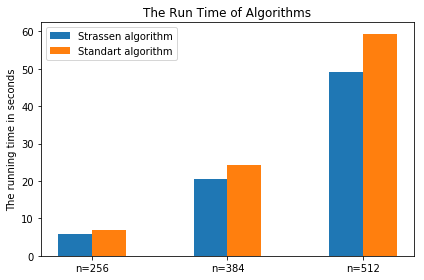

In [15]:
import matplotlib.pyplot as plt
import numpy as np


labels = []
for i in range(len(CasesN)):
    labels.append('n='+str(CasesN[i]))

x = np.arange(len(labels))
width = 0.25 

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, timeRStrassen, width, label='Strassen algorithm')
rects2 = ax.bar(x + width/2, timeRStandart, width, label='Standart algorithm')

ax.set_ylabel('The running time in seconds')
ax.set_title('The Run Time of Algorithms')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
fig.tight_layout()

plt.show()